In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn.neural_network as nn
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA

In [2]:
datos = pd.read_csv("FOTOSINTESIS.csv", delimiter=";")

In [3]:
datos.head()

,Ano,Cod,Bloque,Altura planta,Area de copa (A) =m2,Diametro tronco (cm),A.F no destructiva m2,P,Asimilacion de CO2,Uso eficiente del agua,...,Conductividad,K,MO,Radiacion,Temperatura,Conductividad electrica,Lluvias acumuladas (mms),Humedad,Numero de dias con lluvia,Total
0,2015,1,1,239.75,4.063267,15.700,10.753787,8.323926,2.36,0.634409,...,0.10,0.169256,2.084278,3086781.006,26.631139,0.017657,1457.3,0.241857,153,991.987500
1,2015,1,2,192.50,5.321635,15.600,7.621132,8.323926,1.73,1.291045,...,0.02,0.169256,2.084278,3086781.006,26.631139,0.017657,1457.3,0.241857,153,540.582500
2,2015,2,2,224.75,7.213035,16.350,13.110679,8.323926,2.72,1.219731,...,0.04,0.169256,2.084278,3086781.006,26.631139,0.017657,1457.3,0.241857,153,267.533333
3,2015,3,2,158.00,2.744031,13.025,3.252769,8.323926,3.20,1.245136,...,0.05,0.169256,2.084278,3086781.006,26.631139,0.017657,1457.3,0.241857,153,1826.063750
4,2015,4,2,196.00,5.925922,16.525,8.810752,8.323926,5.70,1.775701,...,0.07,0.169256,2.084278,3086781.006,26.631139,0.017657,1457.3,0.241857,153,586.963500


In [4]:
print(datos.shape)

(428, 21)


In [5]:
datos = datos.fillna(datos.mean())

In [6]:
datos = datos.drop(['Ano','Cod','Bloque'], axis=1)

In [7]:
cols_to_norm = ['Altura planta','Area de copa (A) =m2', 'Diametro tronco (cm)','A.F no destructiva m2','P','Asimilacion de CO2','Uso eficiente del agua','Transpiracion','Conductividad','K','MO','Radiacion','Temperatura','Conductividad electrica','Lluvias acumuladas (mms)','Humedad',' Numero de dias con lluvia','Total']
datos[cols_to_norm] = datos[cols_to_norm].apply(lambda X: (X - X.min()) / (X.max() - X.min()))

In [8]:
X = datos.values[:,:-1]  
Y = datos.values[:,-1]
names=datos.columns

In [9]:
# Matriz de covarianza
mean_vec=np.mean(X,axis=0)
cov_mat=(X-mean_vec).T.dot((X-mean_vec))/(X.shape[0]-1)

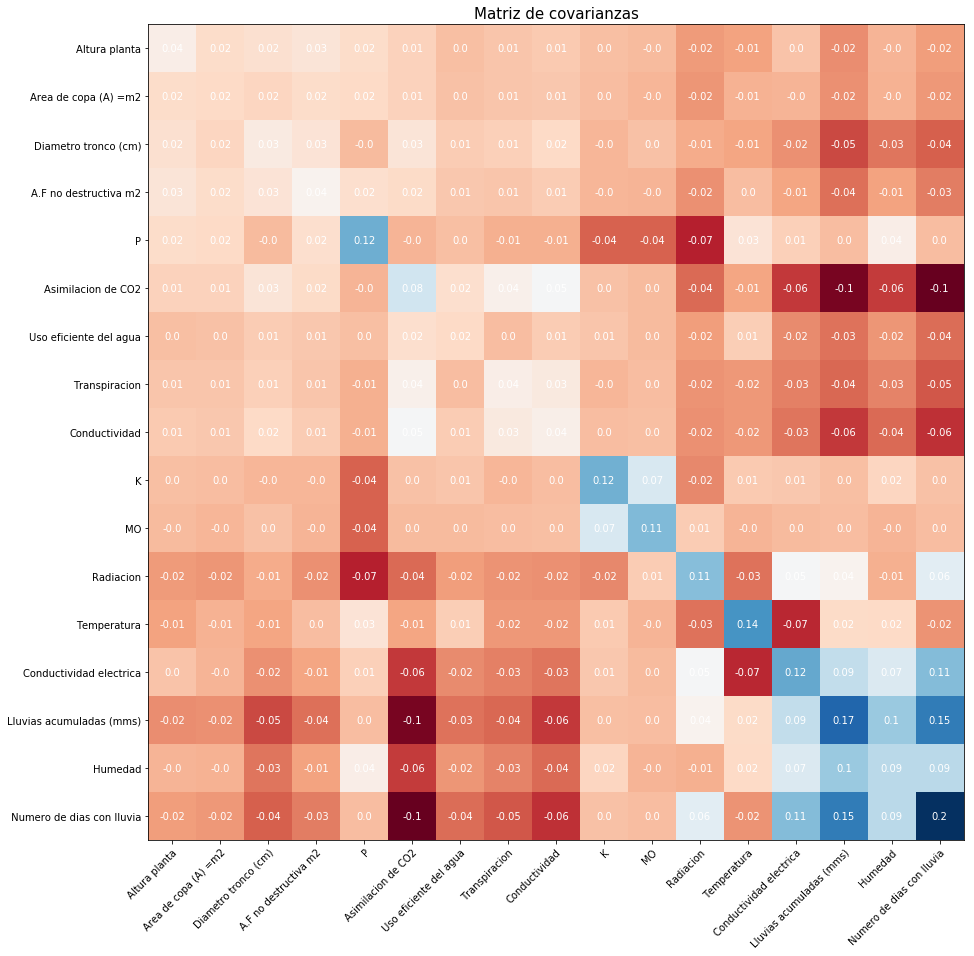

In [10]:
#Gráficar en un mapa de calor las covarianzas

corMat=np.asarray(cov_mat)

fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(corMat,cmap="RdBu")

# Mostrar las etiquetas de las variables
ax.set_xticks(np.arange(len(names)-1))
ax.set_yticks(np.arange(len(names)-1))

# Asignar los nombres a las 
ax.set_xticklabels(names[:])
ax.set_yticklabels(names[:])

# Rotar los nombres
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop para asignar los valores de las correlaciones en el mapa de calor
for i in range(len(names)-1):
    for j in range(len(names)-1):
        text = ax.text(j, i, round(corMat[i, j],2),
                       ha="center", va="center", color="w")

plt.title("Matriz de covarianzas", fontdict={"fontsize":15}) # o de correlación si los datos están normalizados
plt.show();

In [11]:
eigen_value, eigen_vector =np.linalg.eig(corMat)
print("Valores propios \n  %s \n" %eigen_value)
print("Vectores propios \n %s" %eigen_vector)

Valores propios 
  [6.14643613e-01 2.50728712e-01 2.05181221e-01 1.61371748e-01
 7.47188113e-02 4.94171802e-02 4.09635611e-02 3.31295063e-02
 1.90383373e-02 1.09725871e-02 1.05567938e-02 5.34211292e-03
 3.55685049e-03 2.02823109e-03 1.44231494e-03 1.58285451e-03
 3.64275895e-17] 

Vectores propios 
 [[-6.37991229e-02  5.32535042e-02 -8.63994465e-02  2.84682661e-01
   3.56784006e-01 -1.33779301e-01  2.96931799e-01 -1.43495159e-01
   5.95030933e-02 -4.30988947e-01 -4.44431318e-01  2.80136130e-01
   4.29637584e-01  2.72798117e-02 -3.51101264e-03  1.03181766e-03
   3.60682088e-16]
 [-6.40158021e-02  6.42646434e-02 -4.17765296e-02  1.86934658e-01
   1.87098080e-01 -8.40293991e-02  1.47032835e-01 -4.64906936e-02
   5.52787825e-02 -4.72065598e-02 -1.57183643e-01  3.08791026e-01
  -8.69254525e-01  1.78922953e-02 -8.07530883e-02  3.80538404e-02
  -1.13621458e-15]
 [-1.51264737e-01 -4.64005991e-02 -9.57275809e-02  1.15839058e-01
   3.66145564e-01 -9.50902155e-02  1.77718307e-01  1.17684592e-02
 

In [12]:
var=[(eigen_value[i]/sum(eigen_value)*100) for i in range(len(eigen_value))]
var_cum=[]
for i in range(len(var)):
    var_cum.append(sum(var[:i+1]))
var_cum

[41.39921845667413,
 58.287009226236755,
 72.1069563182997,
 82.97612358012664,
 88.00879670634299,
 91.33728267377423,
 94.09637652600499,
 96.32780892188458,
 97.61013296617935,
 98.34918974765057,
 99.06024084211987,
 99.42005797096093,
 99.65962904505454,
 99.7962402135695,
 99.89338709705278,
 100.0,
 100.0]

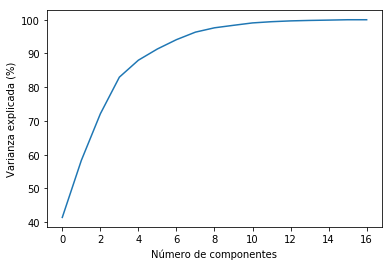

In [13]:
plt.plot(var_cum,linestyle="-")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada (%)")
plt.show()

In [14]:
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
# hacer validación cruzada
kf = KFold(n_splits=5,random_state=0, shuffle=True)
kf.get_n_splits(X)

5

In [16]:
pca = PCA(n_components=8)

In [17]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
X = pca.transform(X)

In [19]:
X.shape

(428, 8)

In [31]:
#CON VALIDACIÓN CRUZADA

R = []
MSE = []   
MAE = []   
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    mlp = nn.MLPRegressor(solver='adam', hidden_layer_sizes=10, max_iter=100, activation='relu', random_state=1, learning_rate_init=0.025, batch_size='auto', momentum=0.09)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print("R2: ", r2)
    print("MSE: ", mse)
    print("RMSE: ", np.sqrt(mse))
    print('MAE: ', mae)
    R.append(r2)
    MSE.append(mse)
    MAE.append(mae)
print("meanR2: ",np.array(R).mean())
print("meanMSE: ",np.array(MSE).mean())
print("meanRMSE: ", np.sqrt(MSE).mean())
print('meanMAE: ',np.array(MAE).mean())

R2:  0.16668435344447097
MSE:  0.024934470319676726
RMSE:  0.1579065239933953
MAE:  0.12219147616267415
R2:  0.15623525809694117
MSE:  0.018664280557718984
RMSE:  0.13661727766911103
MAE:  0.11022692411569701
R2:  0.059803260696553395
MSE:  0.019025512928646314
RMSE:  0.13793300159369518
MAE:  0.10761346742119242
R2:  0.14288643988160288
MSE:  0.026499338825096863
RMSE:  0.16278617516575805
MAE:  0.11306830041257576
R2:  -0.08856094642018753
MSE:  0.017238854590130796
RMSE:  0.13129681865959586
MAE:  0.10263974860479351
meanR2:  0.08740967313987617
meanMSE:  0.021272491444253937
meanRMSE:  0.14530795941631108
meanMAE:  0.11114798334338656


In [21]:
pca.components_.shape

(8, 17)

In [23]:
pca.explained_variance_ratio_

array([0.41399218, 0.16887791, 0.13819947, 0.10869167, 0.05032673,
       0.03328486, 0.02759094, 0.02231432])